In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
import datetime as dt

# Datasets

In [3]:
data = pd.read_excel('Cart_Data-_2_.xlsx')
df=data.copy()
df.head()

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Customer_ID,Order_City,Order ID,Product Name,SKU,Barcode,Quantity,Price,Type,Category
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,FAT017,Karachi,5659,Oriental Migration Coat,303-16,303-16,1,3490.0,Coat,Outer Garments
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,ZEH333,Lahore,5660,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,ZEH333,Lahore,5660,Summer Shades - Beige,20-K-250,20-K-250,1,5980.0,Unstitched Kurta,Unstitched
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,ZEH333,Lahore,5660,Summer Shades - Pink,20-K-252,20-K-252,1,5980.0,Unstitched Kurta,Unstitched
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,ZEH736,Lahore,5661,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched


In [3]:
Cust_cancel=df[(df["Cancelled Reason"]=="Customer Canceled")]
Cust_cancel

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Customer_ID,Order_City,Order ID,Product Name,SKU,Barcode,Quantity,Price,Type,Category
70,70,2020,2020-03-07 23:58:01,NaN,iPhone,NaN,NaN,False,PKR,0,...,SEL104,Islamabad,5698,Snappy Mustard Yellow,20-K-496,20-K-496,1,5080.0,Kurta,Upper Half Garments
73,73,2020,2020-04-07 00:12:53,NaN,iPhone,NaN,NaN,False,PKR,0,...,SEL104,Islamabad,5701,Summer Shades - Yellow,20-K-256,20-K-256,1,5980.0,Unstitched Kurta,Unstitched
198,198,2020,2020-06-07 11:55:48,2020-09-07 11:06:28,Android,NaN,NaN,False,PKR,0,...,SAH333,Faisalabad,5787,Classical Bing - Denim Blue,20-K-400,20-K-400,1,4490.0,Kurta,Upper Half Garments
199,199,2020,2020-06-07 11:55:48,2020-09-07 11:06:28,Android,NaN,NaN,False,PKR,0,...,SAH333,Faisalabad,5787,Ajrak Top,5-19-4year,5-19-4year,1,1290.0,Kids-Girls,Child Wear
261,261,2020,2020-07-07 22:51:31,NaN,iPhone,NaN,NaN,False,PKR,0,...,LUB874,Islamabad,5832,Eid Glory - Yellolw,20-K-455,20-K-455,1,5480.0,Kurta,Upper Half Garments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,6781,2021,2021-02-07 02:10:34,2021-02-07 02:11:06,Android,NaN,NaN,False,PKR,0,...,ARM368,Lahore,10756,Kantha Dream - White,21-K-477,21-K-477,1,6990.0,Kurta,Upper Half Garments
6904,6904,2021,2021-05-07 22:58:33,2021-05-07 22:58:55,iPhone,NaN,NaN,False,PKR,0,...,AMN529,Lahore,10884,L Shape Jisti,21-K-471,21-K-471,1,6990.0,Kurta,Upper Half Garments
6942,6942,2021,2021-06-07 23:13:03,2021-06-07 23:38:43,Web,NaN,NaN,False,PKR,0,...,IZZ319,Islamabad,10911,Gharara Suit - Pink,21-BS-41,21-BS-41,1,5500.0,Girls,Child Wear
6943,6943,2021,2021-06-07 23:13:03,2021-06-07 23:38:43,Web,NaN,NaN,False,PKR,0,...,IZZ319,Islamabad,10911,Gharara Suit - Powder Green,21-BS-49,21-BS-49,1,5500.0,Girls,Child Wear


In [4]:
Dup_order=df[(df["Cancelled Reason"]=="Duplicate Order")]
Dup_order

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Customer_ID,Order_City,Order ID,Product Name,SKU,Barcode,Quantity,Price,Type,Category
122,122,2020,2020-04-07 19:34:53,2020-07-07 10:59:34,Android,NaN,NaN,False,PKR,0,...,ARO499,Rawalpindi,5739,Classical Bing - Denim Blue,20-K-399,20-K-399,1,4490.0,Kurta,Upper Half Garments
123,123,2020,2020-04-07 19:41:18,2020-07-07 10:59:34,Android,NaN,NaN,False,PKR,0,...,ARO499,Rawalpindi,5740,Classical Bing - Peach,20-K-405,20-K-405,1,4490.0,Kurta,Upper Half Garments
206,206,2020,2020-06-07 12:49:53,2020-09-07 11:06:28,iPhone,NaN,NaN,False,PKR,0,...,IQR999,Lahore,5793,Behbud Classics Shalwar Sunflower,229-16,229-16,1,3990.0,Shalwar,Lower Half Garments
207,207,2020,2020-06-07 12:49:53,2020-09-07 11:06:28,iPhone,NaN,NaN,False,PKR,0,...,IQR999,Lahore,5793,Small Herbs White,18-18-MED,18-18-MED,1,3990.0,Shalwar,Lower Half Garments
344,344,2020,2020-10-07 02:47:40,2020-10-07 10:24:08,Android,NaN,NaN,False,PKR,0,...,TAZ810,Karachi,5881,New Beige Triangles,20-K-482,20-K-482,1,3990.0,Kurta,Upper Half Garments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,6806,2021,2021-02-07 16:15:36,2021-02-07 16:16:19,iPhone,NaN,NaN,False,PKR,0,...,SAD763,Lahore,10822,Block Print and Gota - Black,21-K-524,21-K-524,1,4490.0,Kurta,Upper Half Garments
6807,6807,2021,2021-02-07 16:15:36,2021-02-07 16:16:19,iPhone,NaN,NaN,False,PKR,0,...,SAD763,Lahore,10822,Block Trend,21-K-511,21-K-511,1,3490.0,Kurta,Upper Half Garments
7012,7012,2021,2021-10-07 15:08:45,NaN,Web,NaN,NaN,False,PKR,0,...,RAB138,Islamabad,10961,Angrakha Suit - Yellow,21-BS-25,21-BS-25,1,3890.0,Girls,Child Wear
7026,7026,2021,2021-10-07 22:31:55,2021-10-07 22:33:20,Android,NaN,NaN,False,PKR,0,...,MAR737,Karachi,10970,Angrakha Chunk,21-BS-113,21-BS-113,1,3190.0,Girls,Child Wear


In [5]:
OFS=df[(df["Cancelled Reason"]=="Out Of Stock")]
OFS

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Customer_ID,Order_City,Order ID,Product Name,SKU,Barcode,Quantity,Price,Type,Category
140,140,2020,2020-05-07 00:10:07,2020-07-07 10:59:34,iPhone,NaN,NaN,False,PKR,0,...,HIB626,Lahore,5752,Eid Glam - Grey,20-K-425,20-K-425,1,6480.0,Kurta,Upper Half Garments
141,141,2020,2020-05-07 00:10:07,2020-07-07 10:59:34,iPhone,NaN,NaN,False,PKR,0,...,HIB626,Lahore,5752,Classical Bing - Denim Blue,20-K-398,20-K-398,1,4490.0,Kurta,Upper Half Garments
142,142,2020,2020-05-07 00:10:07,2020-07-07 10:59:34,iPhone,NaN,NaN,False,PKR,0,...,HIB626,Lahore,5752,Classical Bing - Yellow,20-K-409,20-K-409,1,4490.0,Kurta,Upper Half Garments
143,143,2020,2020-05-07 00:10:07,2020-07-07 10:59:34,iPhone,NaN,NaN,False,PKR,0,...,HIB626,Lahore,5752,Crown Sparrow - Black,20-K-411,20-K-411,1,4490.0,Kurta,Upper Half Garments
144,144,2020,2020-05-07 00:10:07,2020-07-07 10:59:34,iPhone,NaN,NaN,False,PKR,0,...,HIB626,Lahore,5752,Classical Bing - Peach,20-K-404,20-K-404,1,4490.0,Kurta,Upper Half Garments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626,6626,2021,23-06-2021 19:39:45,23-06-2021 19:40:26,Android,NaN,NaN,False,PKR,0,...,ALI809,Lahore,10629,Cutwork key - Shocking Pink,347-19-MED,347-19-MED,1,2990.0,Kurta,Upper Half Garments
6698,6698,2021,27-06-2021 07:39:34,27-06-2021 07:40:02,Android,NaN,NaN,False,PKR,0,...,SAR750,Karachi,10689,Rust Coat,21-G-6,21-G-6,1,6990.0,Kurta,Upper Half Garments
6715,6715,2021,28-06-2021 06:21:57,28-06-2021 06:22:52,Web,NaN,NaN,False,PKR,0,...,RAM479,Islamabad,10704,Frenzy,20-K-1120,20-K-1120,1,3990.0,Kurta,Upper Half Garments
6719,6719,2021,28-06-2021 11:24:59,28-06-2021 11:25:43,Android,NaN,NaN,False,PKR,0,...,SYE667,Lahore,10707,Orange Jisti bag,20-HB-12,20-HB-12,1,2490.0,Bag,Accessories


In [34]:
df['month name'] = df['Created Date'].dt.month_name(locale='English')

In [32]:
df['Week of year']=df['Verified Date'].dt.weekofyear

<ipython-input-32-6eb76c7a3d9b>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week of year']=df['Verified Date'].dt.weekofyear


In [57]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


# Category

In [167]:
df['month name'].max()

'September'

In [171]:
df['Fulfillment Time'].min()

'10 days'

In [179]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


In [172]:

import plotly.express as px  Fulfillment Time


In [182]:
n = df.groupby(['Verify_Days_Name', 'Category', 'Status']).Quantity.sum().reset_index()
px.scatter(n, x='month name', y='Quantity', color='Status', size='Quantity', hover_data=['Category', 'Status'])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Verify_Days_Name', 'Category', 'Status', 'Quantity'] but received: month name

In [178]:
number_of_prod = df.groupby('Order ID')['Fulfillment Time'].nunique().sort_values(ascending=False)
number_of_prod
number_of_prod_df = pd.DataFrame(list(number_of_prod.items()), columns=['Order ID', 'Quantity'])

a = number_of_prod_df[number_of_prod_df['Quantity'] == 1].value_counts().sum()
b = number_of_prod_df[number_of_prod_df['Quantity'] != 1].value_counts().sum()

data = {'Order': ['One Category', 'More than One Category'], 'Customer_Counts': [a, b]}

category_counts = pd.DataFrame.from_dict(data)

fig = px.pie(category_counts, 
             values = category_counts.Customer_Counts, 
             names = category_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

In [ ]:
number_of_prod = df.groupby('Order ID')['Category'].nunique().sort_values(ascending=False)

number_of_prod_df = pd.DataFrame(list(number_of_prod.items()), columns=['Order ID', 'Quantity'])

a = number_of_prod_df[number_of_prod_df['Quantity'] == 1].value_counts().sum()
b = number_of_prod_df[number_of_prod_df['Quantity'] != 1].value_counts().sum()

data = {'Order': ['One Category', 'More than One Category'], 'Customer_Counts': [a, b]}

category_counts = pd.DataFrame.from_dict(data)

fig = px.pie(category_counts, 
             values = category_counts.Customer_Counts, 
             names = category_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month name', ylabel='count'>

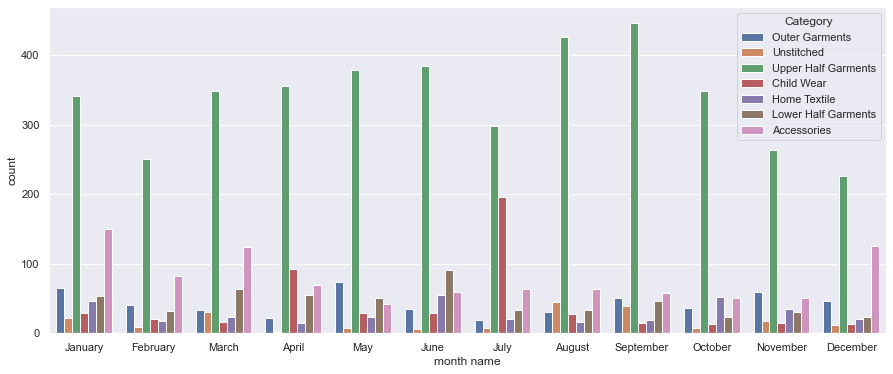

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(df['month name'],hue='Category',data=df) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

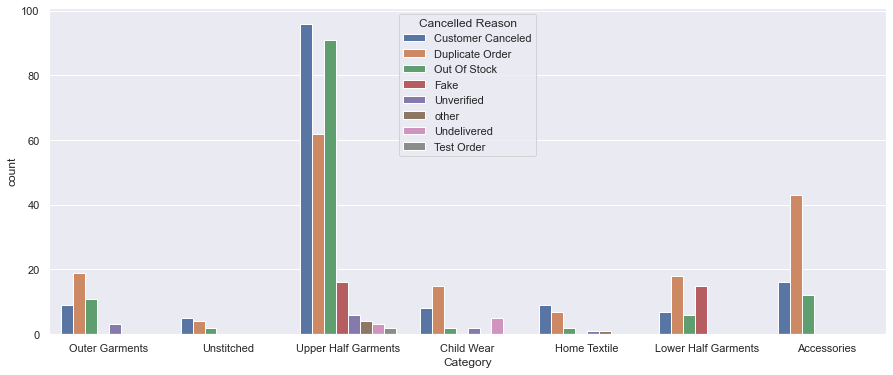

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(df['Category'],hue='Cancelled Reason',data=df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weeks_days', ylabel='count'>

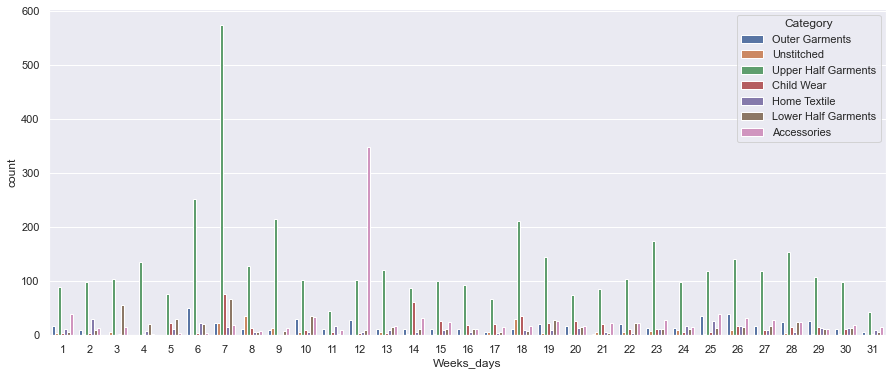

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(df['Weeks_days'],hue='Category',data=df) 

# Cancel order

In [137]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Created_Days_Name', ylabel='count'>

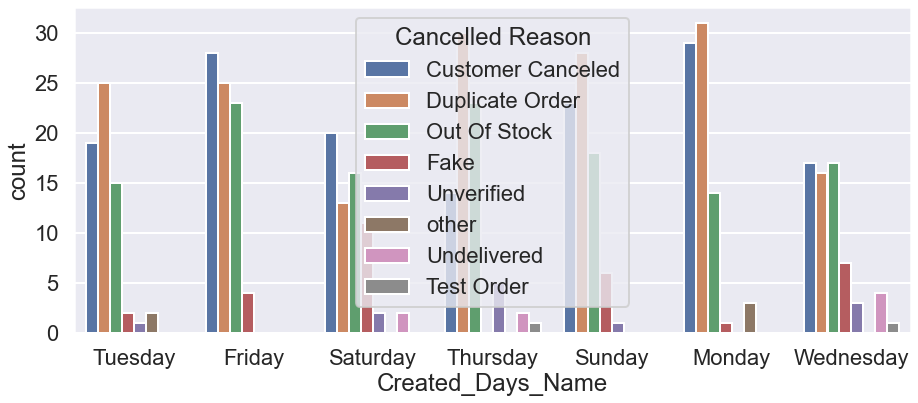

In [163]:
plt.figure(figsize=(15,6))
sns.countplot(df['Created_Days_Name'],hue='Cancelled Reason',data=df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weeks_days', ylabel='count'>

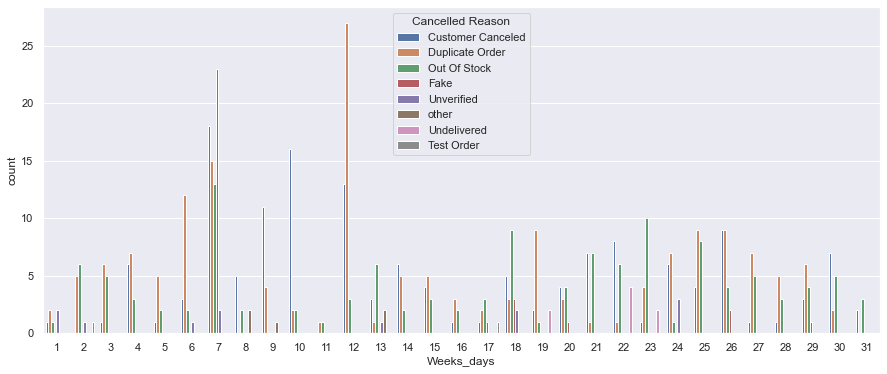

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(df['Weeks_days'],hue='Cancelled Reason',data=df) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month name', ylabel='count'>

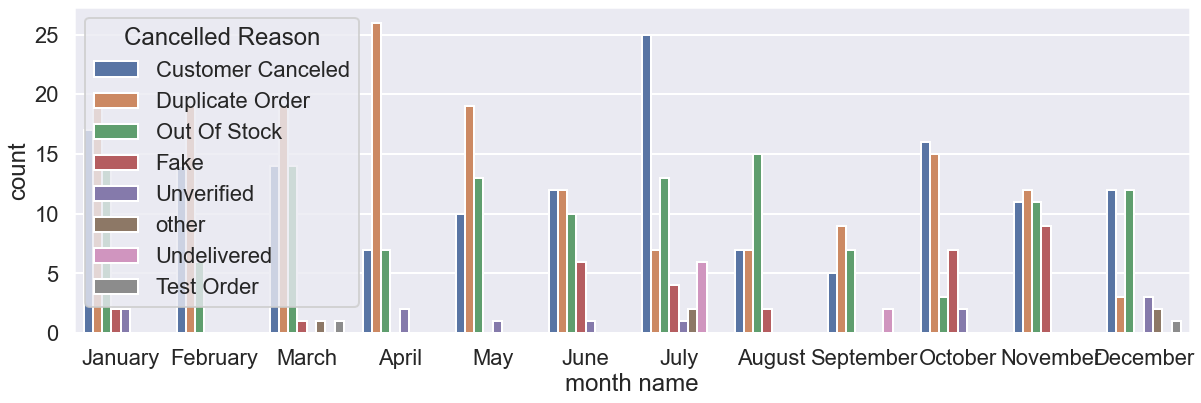

In [133]:
plt.figure(figsize=(20,6))
sns.countplot(df['month name'],hue='Cancelled Reason',data=df) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weeks_days', ylabel='count'>

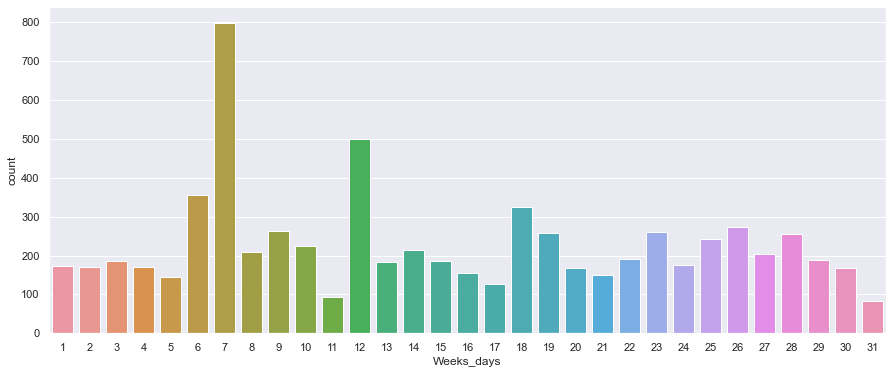

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(df['Weeks_days'],data=OFS)
#plt.xlabel('Weeks wise stats')
#plt.ylabel('Num of Duplicate Orders') 

In [63]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month name', ylabel='count'>

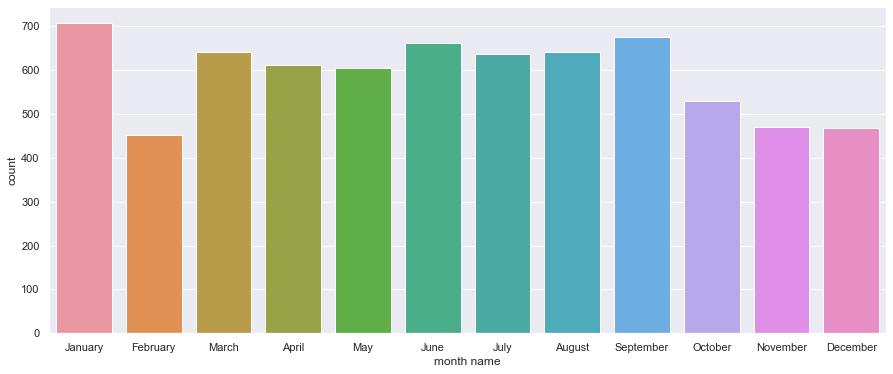

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(df['month name'],data=df)        

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Week of year', ylabel='count'>

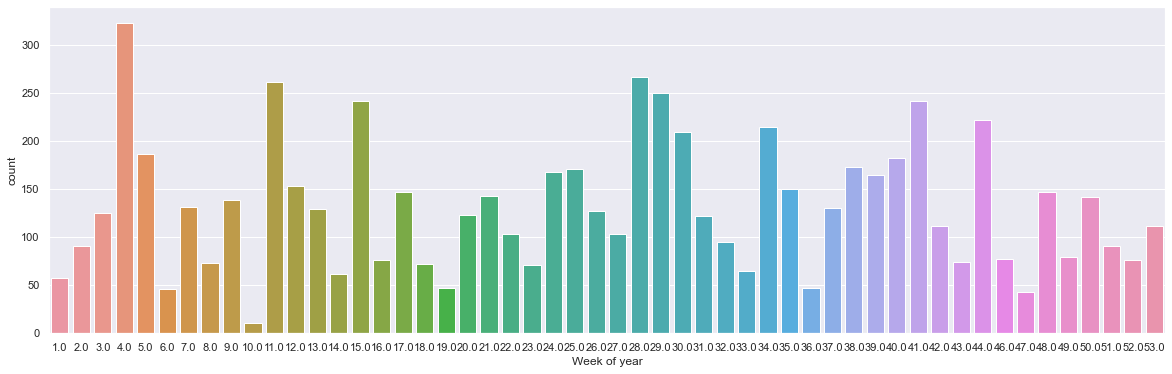

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(df['Week of year'],data=df)  

# time

In [102]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


In [110]:
df['Order_City'].unique()

array(['Karachi', 'Lahore', 'Rawalpindi', 'QUETTA', 'Islamabad',
       'Sheikhupura', 'Lahore ', 'Multan', 'Islamabad ', 'LAHORE',
       'KARACHI', ' Islamabad ', 'KOTLI (AJK)', 'Quetta', 'Sialkot',
       'Faisalabad', 'Sargodha', 'lahore', 'Layyah', 'Larkana ',
       'Sanghar', 'Naushahro Feroze', 'Peshawar', 'Qasba Gujrat',
       'Sargodha ', 'Hyderabad', 'rawalpindi ', 'kotaddu', 'Gujranwala',
       'Sahiwal', 'Bhakkar', 'Shorkot', 'Muzaffarabad', 'Mansehra',
       'Nawabshah', 'Rawalpindi ', 'Bahawalpur', 'Sadiqabad', 'Jhang',
       'Mianwali', 'sheikhupura ', 'Gujranwala ', 'Karachi ', 'Thatta',
       'Jand', 'Mirpur', 'DASKA', 'Petaro', 'Wah Cantt',
       'Mandi Bahauddin', 'DERA GHAZI KHAN', 'Okara', 'Rahim Yar Khan',
       'Kasur', 'Jacobabad', 3315656742, 'Daska', 'RAWALPINDI', 'Kharian',
       'Hazro', 'Badin', 'Blackburn with Darwen', 'Dubai', 'Shikarpur',
       'Woking ', 'Burewala', 'Capital District', 'Khanqah dogran',
       'Larkana', 'Lahorr', 'Abbottabad'

In [108]:
top_6=df.groupby(["Order_City"])['Order_City'].count().nlargest(8).to_frame('count').reset_index()
# top_6.index=top_6["Order_City"]
# top_6.drop(columns=['Order_City'],inplace=True)
# top_6.plot.pie(y='count', figsize=(15, 8))
top_6

,Order_City,count
0,Lahore,2443
1,Karachi,1849
2,Islamabad,741
3,Rawalpindi,320
4,Faisalabad,128
5,Lahore,128
6,Islamabad,113
7,Multan,90


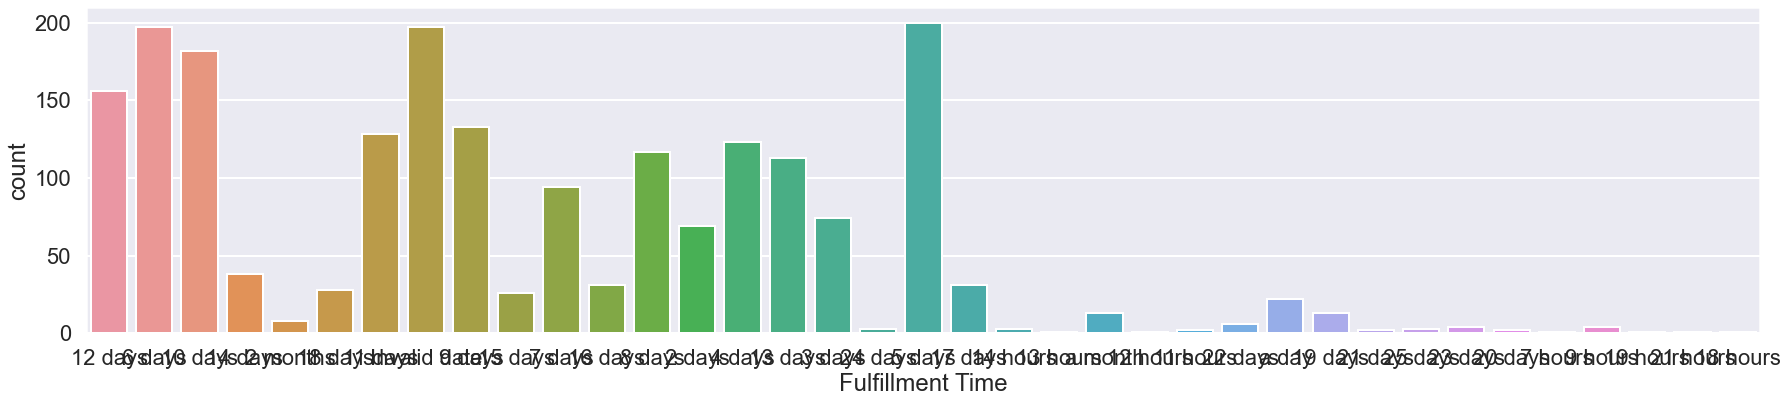

In [185]:
plt.subplots(figsize=(30,6))
sns.countplot(x='Fulfillment Time', data=a);

In [187]:
sns.set_context('poster')
sns.factorplot(kind='box', x='Fulfillment Time', col='month name', row='Pclass', data=a);

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



TypeError: Horizontal orientation requires numeric `x` variable.

In [183]:
# above_3days=df.loc[(df['Created_Days_Name'] == 'Sunday' & 'Saturday')]
# above_3days
a=df.loc[(df['Created_Days_Name'] == 'Sunday') | (df['Created_Days_Name'] == 'Saturday')]
a['Created_Days_Name'].value_counts()
a

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
22,22,2020,2020-03-07 02:23:18,2020-07-07 09:44:14,iPhone,NaN,NaN,False,PKR,0,...,20-K-255-a,1,3490.0,Kurta,Upper Half Garments,Tuesday,Saturday,7,28.0,March
23,23,2020,2020-03-07 02:23:18,2020-07-07 09:44:14,iPhone,NaN,NaN,False,PKR,0,...,20-K-284,1,4990.0,Kurta,Upper Half Garments,Tuesday,Saturday,7,28.0,March
24,24,2020,2020-03-07 02:23:18,2020-07-07 09:44:14,iPhone,NaN,NaN,False,PKR,0,...,20-K-53,1,4490.0,Kurta,Upper Half Garments,Tuesday,Saturday,7,28.0,March
25,25,2020,2020-03-07 02:23:18,2020-07-07 09:44:14,iPhone,NaN,NaN,False,PKR,0,...,20-K-35,1,4490.0,Kurta,Upper Half Garments,Tuesday,Saturday,7,28.0,March
26,26,2020,2020-03-07 02:23:18,2020-07-07 09:44:14,iPhone,NaN,NaN,False,PKR,0,...,14-18-SML,1,1990.0,Shalwar,Lower Half Garments,Tuesday,Saturday,7,28.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7045,2021,2021-11-07 17:49:43,2021-12-07 08:48:14,Android,NaN,NaN,False,PKR,0,...,1-18-LRG,1,2790.0,Kurta,Upper Half Garments,Tuesday,Sunday,7,49.0,November
7046,7046,2021,2021-11-07 18:39:58,2021-12-07 08:48:14,iPhone,NaN,NaN,False,PKR,0,...,21-K-463,1,9990.0,Kurta,Upper Half Garments,Tuesday,Sunday,7,49.0,November
7047,7047,2021,2021-11-07 20:15:11,2021-12-07 08:48:14,Android,NaN,NaN,False,PKR,0,...,21-K-502,1,7990.0,Kurta,Upper Half Garments,Tuesday,Sunday,7,49.0,November
7048,7048,2021,2021-11-07 21:38:58,2021-12-07 08:48:14,iPhone,NaN,NaN,False,PKR,0,...,21-K-520,1,4490.0,Kurta,Upper Half Garments,Tuesday,Sunday,7,49.0,November


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order_City', ylabel='count'>

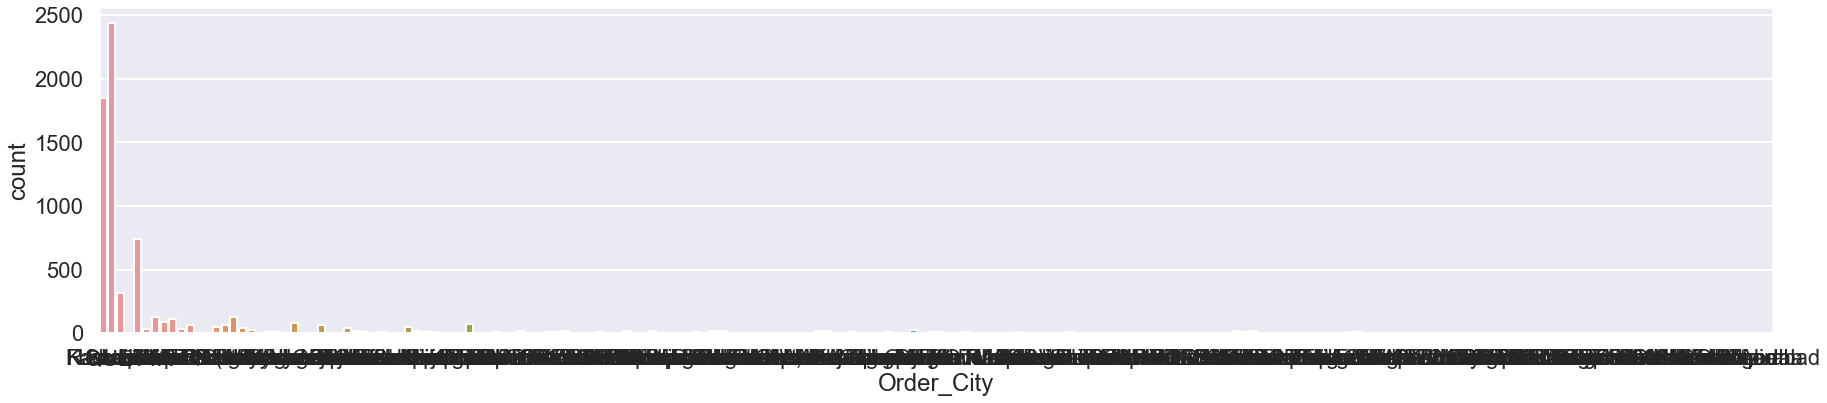

In [160]:
plt.figure(figsize=(30,6))
sns.countplot(df['Order_City'],data=a) 

In [156]:
plt.figure(figsize=(20,6))
sns.countplot(df['Cancelled Reason'],hue='Cancelled Reason',data=a) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1440x432 with 0 Axes>

In [ ]:
Fulfillment Time

# Cancel Orders

In [29]:
df['Verified Date']=pd.to_datetime(df['Verified Date'])

In [31]:
#Days name wise
df['Verify_Days_Name']=df['Verified Date'].dt.day_name()

In [8]:
df['Created Date']=pd.to_datetime(df['Created Date'])

In [21]:
#Week Num
df['Weeks_days']=df['Created Date'].dt.day

In [22]:
df.head()

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Product Name,SKU,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,Oriental Migration Coat,303-16,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Beige,20-K-250,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Pink,20-K-252,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7


In [18]:
#Days name wise
df['Created_Days_Name']=df['Created Date'].dt.day_name()

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(df['Weeks_days'],data=Cust_cancel)
plt.xlabel('Weeks wise stats')
plt.ylabel('Num of Orders Cancel By customer')

KeyError: 'Weeks_days'

<Figure size 1080x432 with 0 Axes>

In [ ]:
df

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Num of Duplicate Orders')

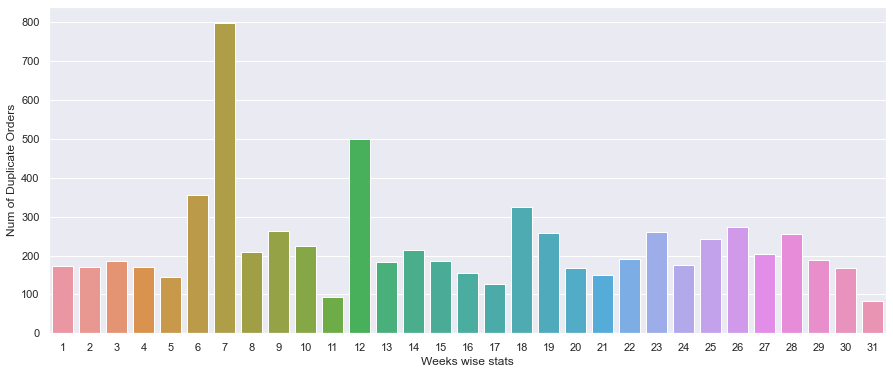

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(df['Weeks_days'],data=Dup_order)
plt.xlabel('Weeks wise stats')
plt.ylabel('Num of Duplicate Orders')

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(df['Weeks_days'],data=OFS)
plt.xlabel('Weeks wise stats')
plt.ylabel('Num of out of stock')

KeyError: 'Weeks_days'

<Figure size 1080x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['Created_Days_Name'],data=df)
plt.xlabel('Created dates Weeks wise stats')
#plt.ylabel('Created data')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Verify date Weeks wise stats')

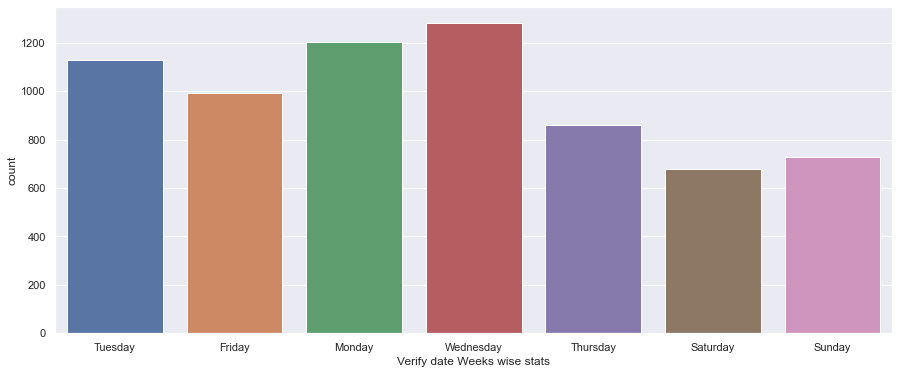

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df['Verify_Days_Name'],data=df)
plt.xlabel('Verify date Weeks wise stats')
#plt.ylabel('Num of out of stock')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Created_Days_Name', ylabel='count'>

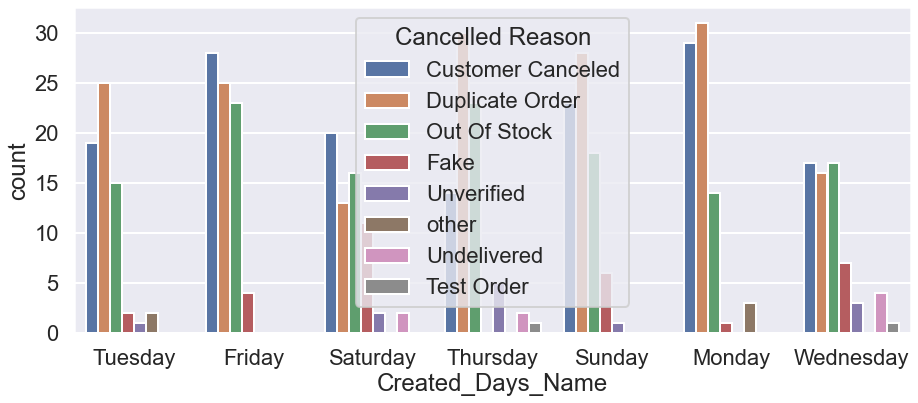

In [135]:
plt.figure(figsize=(15,6))
sns.countplot(df['Created_Days_Name'],hue='Cancelled Reason',data=df)

In [25]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Product Name,SKU,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,Oriental Migration Coat,303-16,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Beige,20-K-250,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Pink,20-K-252,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,White Diamond Shalwar,82-16,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,Ralli Duppatta - White,21-D-14,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,Ajrak Star - Blue,21-BS-119,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,Blocked Elephant,20-HB-2,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13


<AxesSubplot:xlabel='Verify_Days_Name', ylabel='count'>

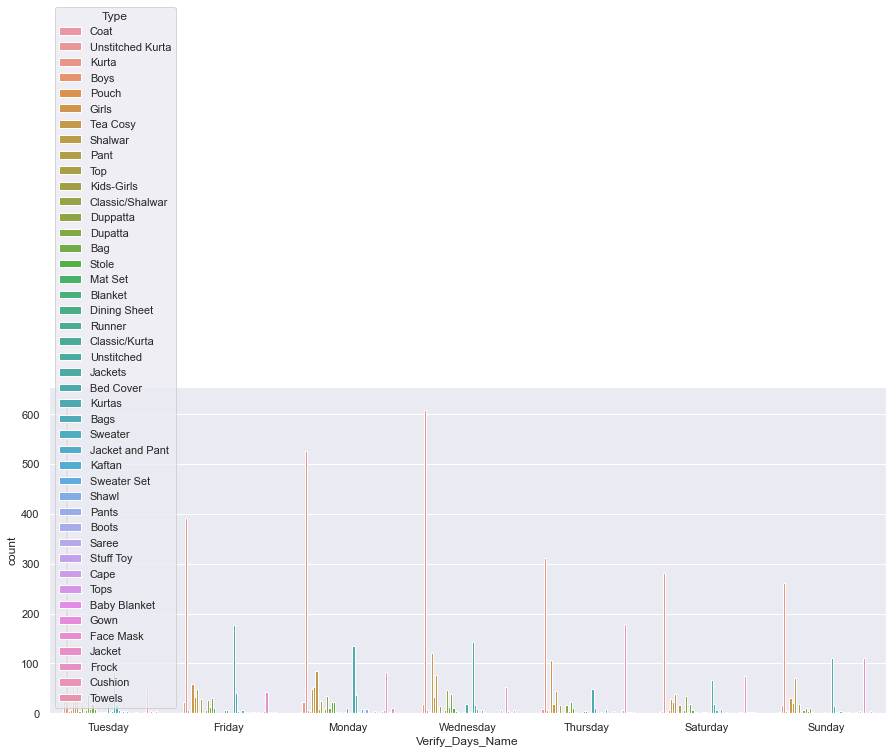

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(df['Verify_Days_Name'],hue='Type',data=df)   

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Verify_Days_Name', ylabel='count'>

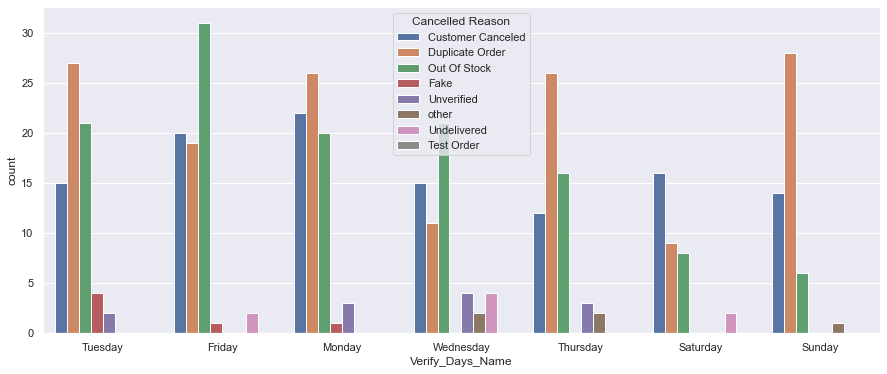

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(df['Verify_Days_Name'],hue='Cancelled Reason',data=df)   

In [14]:
df.head()

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Order_City,Order ID,Product Name,SKU,Barcode,Quantity,Price,Type,Category,Verify_Days_Name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,Karachi,5659,Oriental Migration Coat,303-16,303-16,1,3490.0,Coat,Outer Garments,Tuesday
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5660,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5660,Summer Shades - Beige,20-K-250,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5660,Summer Shades - Pink,20-K-252,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5661,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday


# Shipment

In [15]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Order_City,Order ID,Product Name,SKU,Barcode,Quantity,Price,Type,Category,Verify_Days_Name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,Karachi,5659,Oriental Migration Coat,303-16,303-16,1,3490.0,Coat,Outer Garments,Tuesday
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5660,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5660,Summer Shades - Beige,20-K-250,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5660,Summer Shades - Pink,20-K-252,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,Lahore,5661,Summer Shades - Black,20-K-247,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,Lahore,11017,White Diamond Shalwar,82-16,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,Lahore,11017,Ralli Duppatta - White,21-D-14,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,Islamabad,11018,Ajrak Star - Blue,21-BS-119,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,SIALKOT,11019,Blocked Elephant,20-HB-2,20-HB-2,1,2490.0,Bag,Accessories,NaN


In [16]:
plt.figure(figsize=(15,6))
sns.countplot(df['Created_Days_Name'],data=df) 

KeyError: 'Created_Days_Name'

<Figure size 1080x432 with 0 Axes>

In [17]:
df['Weeks_days'].unique()

KeyError: 'Weeks_days'

In [188]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


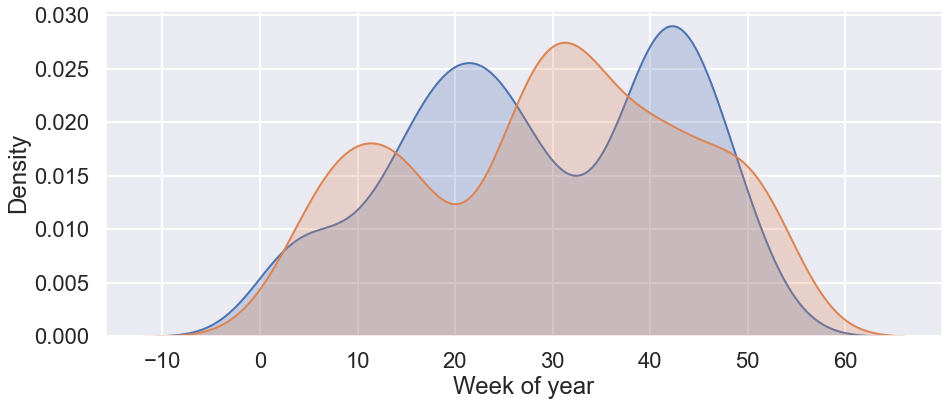

In [193]:
plt.subplots(figsize=(15,6))
sns.kdeplot(df[df['Fulfillment Time'] == '4 days']['Week of year'], shade=True,label='Not Survived');
sns.kdeplot(df[df['Fulfillment Time'] == '10 days']['Week of year'], shade=True,label='Survived');

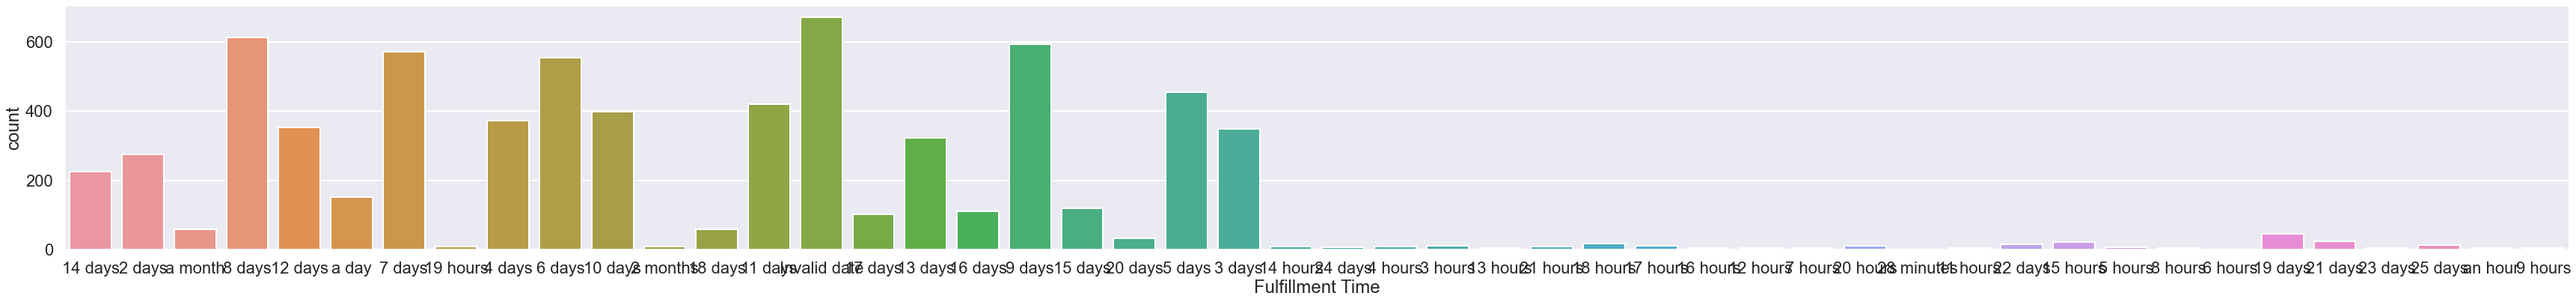

In [200]:
plt.figure(figsize=(60,6))
sns.countplot(x='Fulfillment Time', data=df);

In [205]:
orders = df.groupby(by=['Customer_ID','Order_City'], as_index=False)['Order ID'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.Customer_ID, orders.Order ID)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

SyntaxError: invalid syntax (<ipython-input-205-09d334edf943>, line 4)

<AxesSubplot:xlabel='Price', ylabel='Category'>

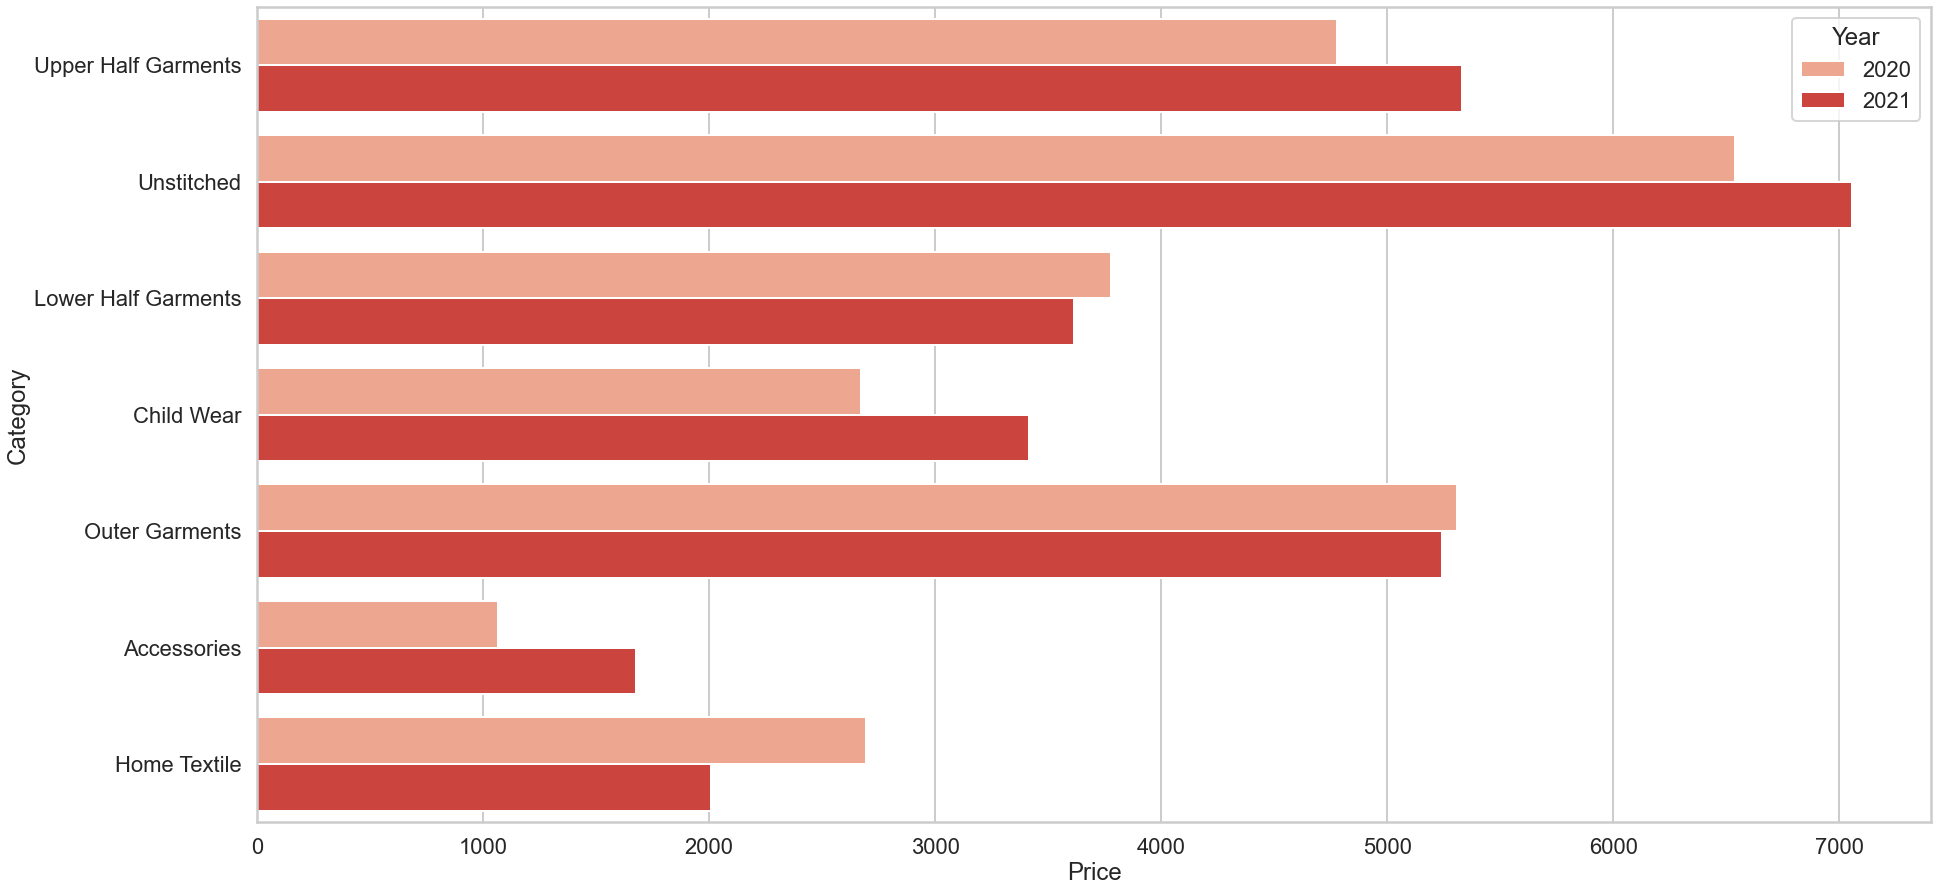

In [208]:
payment_cancel = df[df['Status'].isin(['Canceled'])].fillna(0)

plt.figure(figsize=(30,15))

sns.set_style("whitegrid")
sns.barplot(x='Price', y='Category', data = payment_cancel, ci=None, palette='Reds', hue='Year')

In [209]:
df

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
0,0,2020,2020-01-07 00:11:41,2020-01-07 14:57:37,Android,NaN,NaN,False,PKR,0,...,303-16,1,3490.0,Coat,Outer Garments,Tuesday,Tuesday,7,2.0,January
1,1,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
2,2,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-250,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
3,3,2020,2020-01-07 12:46:40,2020-01-07 14:58:06,iPhone,NaN,NaN,False,PKR,0,...,20-K-252,1,5980.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
4,4,2020,2020-01-07 13:02:06,2020-01-07 14:58:05,iPhone,NaN,NaN,False,PKR,0,...,20-K-247,1,2990.0,Unstitched Kurta,Unstitched,Tuesday,Tuesday,7,2.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,7093,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,82-16,1,4990.0,Shalwar,Lower Half Garments,Tuesday,Tuesday,13,28.0,July
7094,7094,2021,2021-07-13 09:58:50,2021-07-13 09:59:29,Web,NaN,NaN,False,PKR,0,...,21-D-14,1,3990.0,Duppatta,Outer Garments,Tuesday,Tuesday,13,28.0,July
7095,7095,2021,2021-07-13 11:07:48,2021-07-13 11:09:22,iPhone,NaN,NaN,False,PKR,0,...,21-BS-119,1,3490.0,Girls,Child Wear,Tuesday,Tuesday,13,28.0,July
7096,7096,2021,2021-07-13 12:03:39,NaT,Android,NaN,NaN,False,PKR,0,...,20-HB-2,1,2490.0,Bag,Accessories,NaN,Tuesday,13,NaN,July


In [214]:
df_cat_orderDate = pd.DataFrame(df[['Fulfillment Time', 'Year', 'month name']])
df_cat_orderDate = df_cat_orderDate.sort_values(by = ['Year', 'month name'])
df_cat_orderDate

,Fulfillment Time,Year,month name
71,10 days,2020,April
72,14 days,2020,April
73,Invalid date,2020,April
74,11 days,2020,April
75,17 days,2020,April
...,...,...,...
6996,Invalid date,2021,September
6997,Invalid date,2021,September
6998,Invalid date,2021,September
6999,Invalid date,2021,September


In [215]:
df_cat_orderDate = pd.DataFrame(df[['Fulfillment Time', 'Year', 'month name']])
df_cat_orderDate = df_cat_orderDate.sort_values(by = ['Year', 'month name'])
df_cat_orderDate

,Fulfillment Time,Year,month name
71,10 days,2020,April
72,14 days,2020,April
73,Invalid date,2020,April
74,11 days,2020,April
75,17 days,2020,April
...,...,...,...
6996,Invalid date,2021,September
6997,Invalid date,2021,September
6998,Invalid date,2021,September
6999,Invalid date,2021,September


In [217]:
df_cat_orderDate['Year'] =  df_cat_orderDate['Year'].apply(lambda x: str(x))
df_cat_orderDate['month name'] = df_cat_orderDate['month name'].apply(lambda x: str(x))

df_cat_orderDate['Order_Date'] = df_cat_orderDate['Year'] + "-" + df_cat_orderDate['month name']
df_cat_orderDate = pd.crosstab(df_cat_orderDate.Fulfillment Time, df_cat_orderDate.Order_Date, margins = True)
df_cat_orderDate


SyntaxError: invalid syntax (<ipython-input-217-d1e0e2241b67>, line 5)

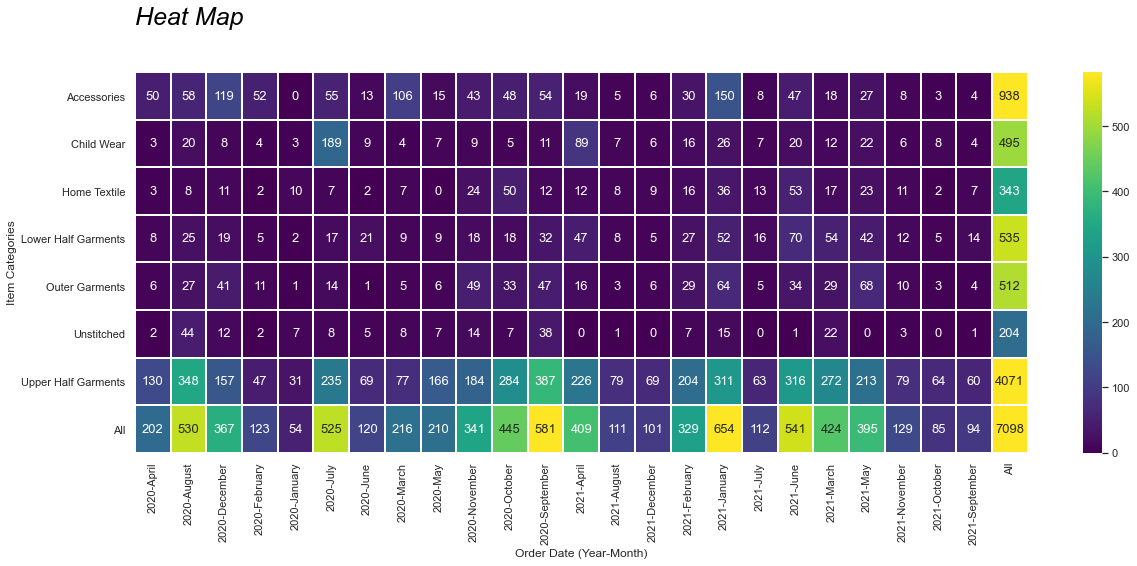

In [213]:
plt.figure(figsize = (20, 7))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)

sns.heatmap(df_cat_orderDate, 
            cmap = 'viridis', 
            robust = True, 
            annot = True, 
            annot_kws = {'size':13}, 
            fmt = ".0f", 
            linecolor = 'white', 
            linewidths = 1, 
            cbar = True, 
            square = False,
            xticklabels = True,
            yticklabels = True) 

plt.xlabel("Order Date (Year-Month)")
plt.ylabel("Item Categories")
plt.text(0,-1, "Heat Map", fontsize = 25, color = 'Black', fontstyle = 'italic')
plt.show()


In [220]:
import plotly.graph_objs as go

In [222]:
layout = go.Layout(title = "Fulfillment Time'/Status", 
                   xaxis = {'title': 'Fulfillment Time'}, 
                   yaxis = {'title': 'Count'}, 
                   showlegend = True, 
                   width = 1000, 
                   height = 500,)

Fulfillment Time.iplot(kind = 'bar', layout = layout) 

SyntaxError: invalid syntax (<ipython-input-222-d5da1eaa1cb5>, line 8)

In [225]:
best_category = df.groupby("Fulfillment Time").count().sort(col("count").desc()).toPandas()
best_category

AttributeError: 'DataFrame' object has no attribute 'sort'

In [223]:
best_category.set_index('Fulfillment Time', inplace=True)
ax = best_category.plot(kind='pie', y='count', autopct='%1.1f%%', figsize=(8,8), title="Best Selling Categories")
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

NameError: name 'best_category' is not defined

In [230]:
df.groupby("Fulfillment Time").count()

,Unnamed: 0,Year,Created Date,Verified Date,Source,Notes,Locality,Abandoned Recovered,Currency,Shipping Charges,...,Barcode,Quantity,Price,Type,Category,Verify_Days_Name,Created_Days_Name,Weeks_days,Week of year,month name
Fulfillment Time,,,,,,,,,,,,,,,,,,,,,
10 days,399,399,399,399,399,57,0,399,399,399,...,399,399,399,399,399,399,399,399,399,399
11 days,420,420,420,420,420,21,0,420,420,420,...,420,420,420,420,420,420,420,420,420,420
11 hours,5,5,5,5,5,0,0,5,5,5,...,5,5,5,5,5,5,5,5,5,5
12 days,353,353,353,353,353,26,0,353,353,353,...,353,353,353,353,353,353,353,353,353,353
12 hours,5,5,5,4,5,0,0,5,5,5,...,5,5,5,5,5,4,5,5,4,5
13 days,323,323,323,323,323,11,0,323,323,323,...,323,323,323,323,323,323,323,323,323,323
13 hours,5,5,5,4,5,1,0,5,5,5,...,5,5,5,5,5,4,5,5,4,5
14 days,226,226,226,226,226,17,0,226,226,226,...,226,226,226,226,226,226,226,226,226,226
14 hours,9,9,9,6,9,0,0,9,9,9,...,9,9,9,9,9,6,9,9,6,9
